In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_csv('train.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
data.shape

(8523, 12)

In [4]:
test = pd.read_csv('test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
test.shape

(5681, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
data.isnull().sum()   # For finding the number of missing values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# Drop the target variable
dr = data.drop(['Item_Outlet_Sales'],axis=1)

In [11]:
# Concatinating the train and test dataset
dr['Predicted_output'] = '0'  # Creating the target varible for prediction for train dataset
test['Predicted_output'] = '1'  # Creating the target varible for prediction for test dataset
data1 = pd.concat([dr,test],ignore_index=True)

In [12]:
data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Predicted_output
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,0


In [13]:
data1.shape

(14204, 12)

In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
Item_Identifier              14204 non-null object
Item_Weight                  11765 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Predicted_output             14204 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 1.3+ MB


In [15]:
data1.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Predicted_output                0
dtype: int64

In [16]:
data1['Item_Weight'].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

In [17]:
data1['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [18]:
data1['Item_Weight'] = data1['Item_Weight'].fillna(data1['Item_Weight'].dropna().mode().values[0])
data1['Outlet_Size'] = data1['Outlet_Size'].fillna(data1['Outlet_Size'].dropna().mode().values[0])

In [19]:
data1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Predicted_output             0
dtype: int64

In [20]:
print((data1==0).sum())    # It shows the value s like 0.000 and which is filled value,so it shoulbe replace with mean value

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              879
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Predicted_output               0
dtype: int64


In [21]:
mean_it = data1['Item_Visibility'].mean()
data1['Item_Visibility'] = data1['Item_Visibility'].replace(0,mean_it)

In [22]:
data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Predicted_output
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,0
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,0
4,NCD19,8.93,Low Fat,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,0


Text(0.5, 1.0, 'Purchase amount Distribution')

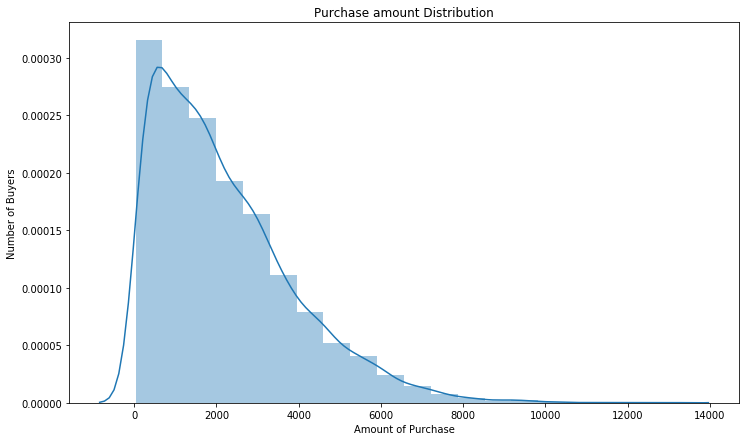

In [23]:
# Distribution of Target variable
plt.figure(figsize=(12,7))
sns.distplot(data.Item_Outlet_Sales,bins=20)
plt.xlabel('Amount of Purchase')
plt.ylabel('Number of Buyers')
plt.title('Purchase amount Distribution')

In [24]:
# This curves diverted towards right side,hence to solve the problem we must have to keep square and cube root of the target variable
Item_Outlet_Sales = data.Item_Outlet_Sales**(1/2)

Text(0.5, 1.0, 'Purchase amount Distribution')

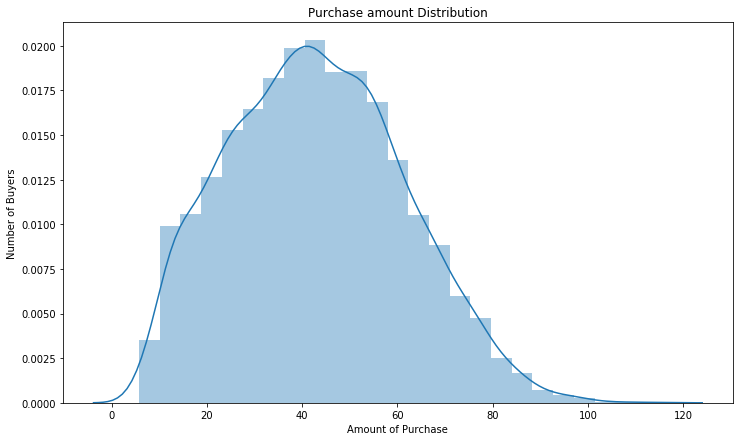

In [25]:
plt.figure(figsize=(12,7))
sns.distplot(Item_Outlet_Sales,bins=25)
plt.xlabel('Amount of Purchase')
plt.ylabel('Number of Buyers')
plt.title('Purchase amount Distribution')      # The graph is distributed the information 

In [26]:
# Both sqaure and cube root gives approximatel same results.So We can do anyone of them,
# Cube root gives more stability.
Item_Outlet_Sales = data.Item_Outlet_Sales**(1/3)    

Text(0.5, 1.0, 'Purchase amount Distribution')

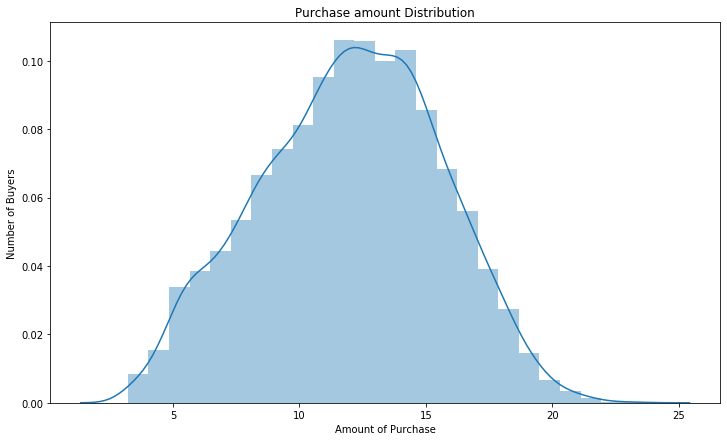

In [27]:
plt.figure(figsize=(12,7))
sns.distplot(Item_Outlet_Sales,bins=25)
plt.xlabel('Amount of Purchase')
plt.ylabel('Number of Buyers')
plt.title('Purchase amount Distribution')  

In [28]:
numeric_features = data1.select_dtypes(include=[np.number])   # Find the data having only numbers

In [29]:
numeric_features

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.30,0.016047,249.8092,1999
1,5.92,0.019278,48.2692,2009
2,17.50,0.016760,141.6180,1999
3,19.20,0.065953,182.0950,1998
4,8.93,0.065953,53.8614,1987
...,...,...,...,...
14199,10.50,0.013496,141.3154,1997
14200,7.60,0.142991,169.1448,2009
14201,10.00,0.073529,118.7440,2002
14202,15.30,0.065953,214.6218,2007


In [30]:
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
dtype: object

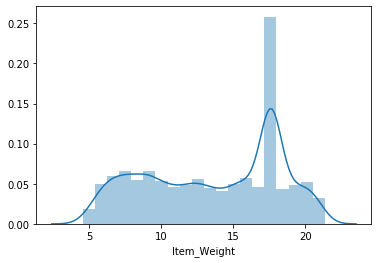

In [31]:
sns.distplot(numeric_features.Item_Weight,bins=20)

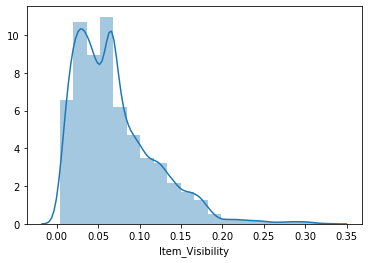

In [32]:
# Item_Visibility would not be stable properly,it diverted towards right.
sns.distplot(numeric_features.Item_Visibility,bins=20)   

In [33]:
Item_Visibility = data.Item_Visibility**(1/2)

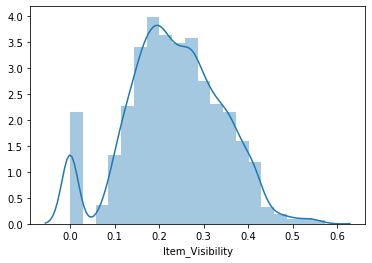

In [34]:
sns.distplot(Item_Visibility,bins=20)

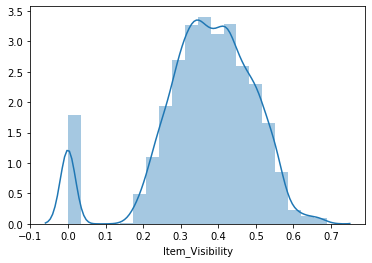

In [35]:
Item_Visibility = data.Item_Visibility**(1/3)
sns.distplot(Item_Visibility,bins=20)   # Cube root gives proper stability

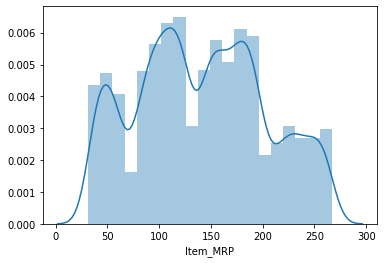

In [36]:
sns.distplot(numeric_features.Item_MRP,bins=20)   

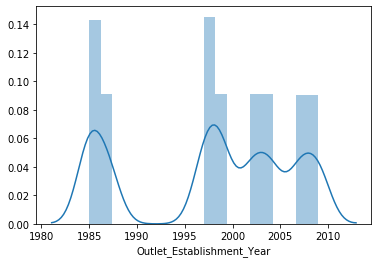

In [37]:
sns.distplot(numeric_features.Outlet_Establishment_Year,bins=20) 

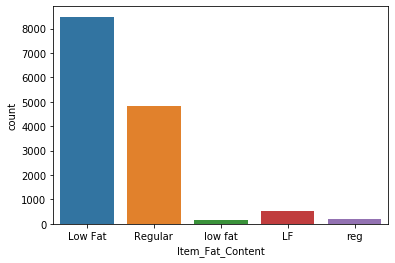

In [38]:
sns.countplot(data1.Item_Fat_Content)

In [39]:
# Replace the variables
data1['Item_Fat_Content'] = data1['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

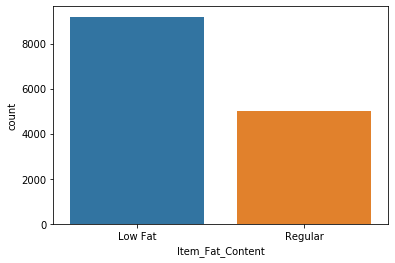

In [40]:
sns.countplot(data1.Item_Fat_Content)

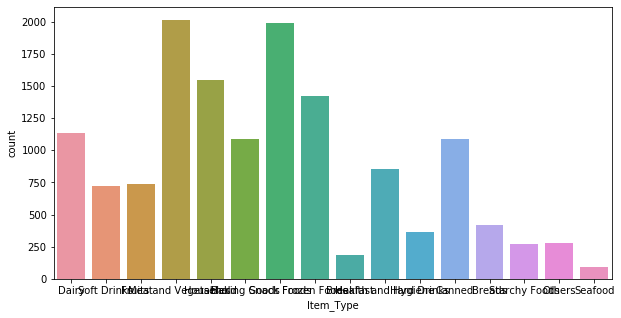

In [41]:
plt.subplots(figsize=(10,5)) 
sns.countplot(data1.Item_Type)

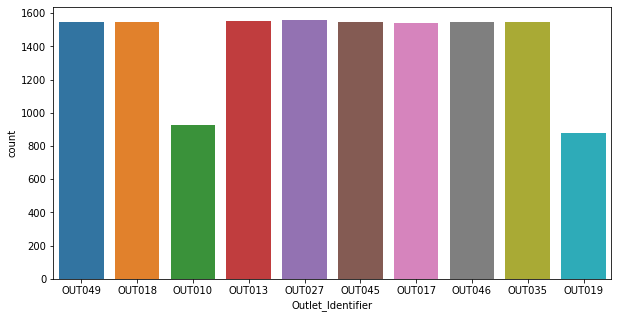

In [42]:
plt.subplots(figsize=(10,5))            # For Increasing the graph ratio.
sns.countplot(data1.Outlet_Identifier)

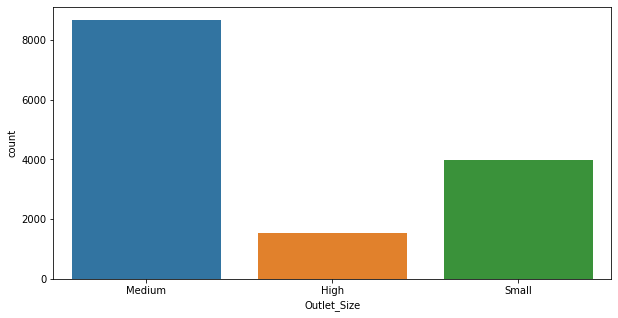

In [43]:
plt.subplots(figsize=(10,5)) 
sns.countplot(data1.Outlet_Size)

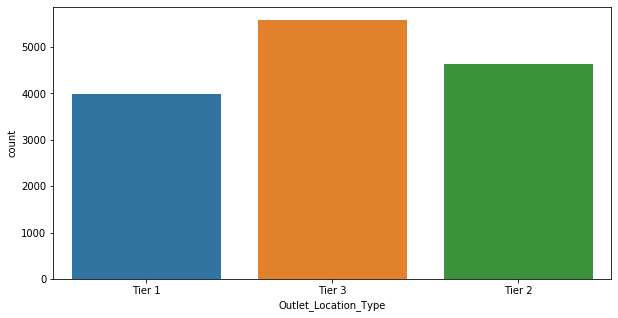

In [44]:
plt.subplots(figsize=(10,5)) 
sns.countplot(data1.Outlet_Location_Type)

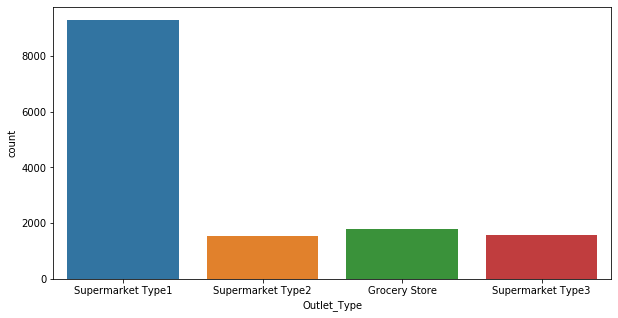

In [45]:
plt.subplots(figsize=(10,5)) 
sns.countplot(data1.Outlet_Type)

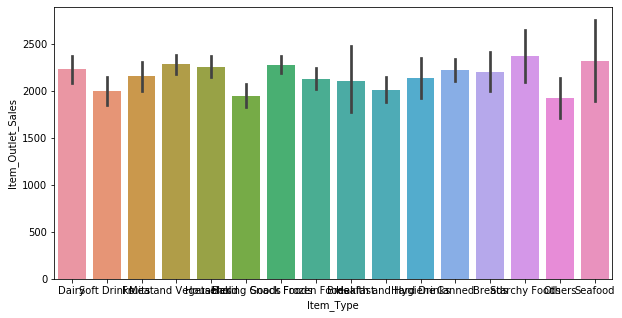

In [46]:
# Comaprison between independant and target variable
plt.subplots(figsize=(10,5)) 
sns.barplot(x="Item_Type",y="Item_Outlet_Sales",data=data)

In [47]:
data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Predicted_output
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,0
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,0
4,NCD19,8.93,Low Fat,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,0


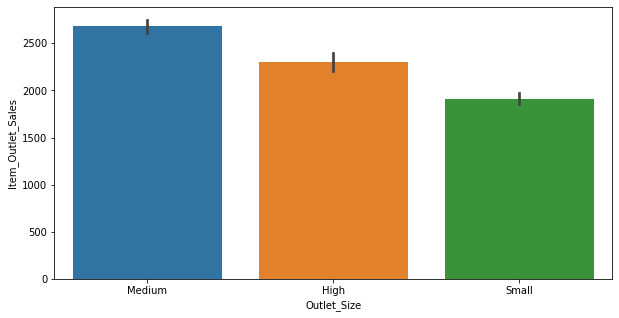

In [48]:
plt.subplots(figsize=(10,5)) 
sns.barplot(x="Outlet_Size",y="Item_Outlet_Sales",data=data)

In [49]:
data1.Item_Identifier.unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [50]:
#feature engineering  ( The purpose of this is to take two columns FD,DR and NC CODE and combine the entries in each row into a new row)
data1['Item'] = data1['Item_Identifier'].apply(lambda x:x[0:2])

In [51]:
data1.Item

0        FD
1        DR
2        FD
3        FD
4        NC
         ..
14199    FD
14200    FD
14201    NC
14202    FD
14203    FD
Name: Item, Length: 14204, dtype: object

In [52]:
data1['Item'] = data1['Item'].replace({'FD':'Food','DR':'Drinks','NC':'Non-Consumable'})
data1['Item'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item, dtype: int64

In [53]:
data1.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [54]:
data1.loc[data1['Item']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data1['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [55]:
data1.Item_MRP.nunique()

8052

In [56]:
# Notations of Item_MRP
for i in range(data1.shape[0]):
    if (data1['Item_MRP'].loc[i]<69):
        data1.at[i,"Item_MRP"]='1'
    elif (data1['Item_MRP'].loc[i]>=69 + data1['Item_MRP'].loc[i] < 136):
        data1.at[i,"Item_MRP"]='2'
    elif (data1['Item_MRP'].loc[i]>=136 + data1['Item_MRP'].loc[i] < 192):
        data1.at[i,"Item_MRP"]='3'
    else:
        data1.at[i,"Item_MRP"]='4'

In [57]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lst= ['Item_Fat_Content', 'Item', 'Outlet_Location_Type',  'Outlet_Type' ,'Outlet_Size','Outlet_Identifier','Item_Identifier','Item_Type']
for i in lst:
    data1[i]= lb.fit_transform(data1[i])

In [58]:
data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Predicted_output,Item
0,156,9.30,0,0.016047,4,4.0,9,1999,1,0,1,0,1
1,8,5.92,2,0.019278,14,1.0,3,2009,1,2,2,0,0
2,662,17.50,0,0.016760,10,4.0,9,1999,1,0,1,0,1
3,1121,19.20,2,0.065953,6,4.0,0,1998,1,2,0,0,1
4,1297,8.93,1,0.065953,9,1.0,1,1987,0,2,1,0,2


In [59]:
data1.shape

(14204, 13)

In [60]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Identifier              14204 non-null int32
Item_Weight                  14204 non-null float64
Item_Fat_Content             14204 non-null int32
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null int32
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null int32
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  14204 non-null int32
Outlet_Location_Type         14204 non-null int32
Outlet_Type                  14204 non-null int32
Predicted_output             14204 non-null object
Item                         14204 non-null int32
dtypes: float64(3), int32(8), int64(1), object(1)
memory usage: 998.8+ KB


In [61]:
data1.Outlet_Identifier.unique()

array([9, 3, 0, 1, 5, 7, 2, 8, 6, 4], dtype=int64)

In [62]:
data1.Item_Type.unique()

array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12],
      dtype=int64)

In [63]:
data1.Item.unique()

array([1, 0, 2], dtype=int64)

In [64]:
data1.drop(['Item_Type','Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [65]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 9 columns):
Item_Weight             14204 non-null float64
Item_Fat_Content        14204 non-null int32
Item_Visibility         14204 non-null float64
Item_MRP                14204 non-null float64
Outlet_Size             14204 non-null int32
Outlet_Location_Type    14204 non-null int32
Outlet_Type             14204 non-null int32
Predicted_output        14204 non-null object
Item                    14204 non-null int32
dtypes: float64(3), int32(5), object(1)
memory usage: 721.4+ KB


In [66]:
train = data1.loc[data['Predicted_output']=="X"]
test1 = data1.loc[data['Predicted_output']=="test"]
test1.drop(['Predicted_output'],axis=1,inplace=True)
train.drop(['Predicted_output'],axis=1,inplace=True)

KeyError: 'Predicted_output'

In [ ]:
var_train = data1.iloc[:,[0,1,2,3,4,5,6,8]].values
var_test = data1.iloc[:,[7]].values

In [ ]:
from sklearn.model_selection import train_test_split
# variable = data['Item_Outlet_Sales']
x_train,x_test,y_train,y_test = train_test_split(var_train,var_test,test_size=0.3,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
# data1.Predicted_output = pd.to_numeric(data1.Predicted_output)

In [ ]:
# Using Classification Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
lr = LinearRegression()

In [ ]:
lr.fit(x_train,y_train)
prediction = lr.predict(x_test)
rms_val = sqrt(mean_squared_error(y_test,prediction))

In [ ]:
print(rms_val)